In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
cc = pd.read_csv('BankChurners.csv')
cc

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
cc.shape

(10127, 23)

In [6]:
X = cc.iloc[1:200,[2,9]].values
print(X)

[[49 44]
 [51 36]
 [40 34]
 [40 21]
 [44 36]
 [51 46]
 [32 27]
 [37 36]
 [48 36]
 [42 31]
 [65 54]
 [56 36]
 [35 30]
 [57 48]
 [44 37]
 [48 36]
 [41 34]
 [61 56]
 [45 37]
 [47 42]
 [62 49]
 [41 33]
 [47 36]
 [54 42]
 [41 28]
 [59 46]
 [63 56]
 [44 34]
 [47 42]
 [53 33]
 [53 48]
 [41 36]
 [53 38]
 [58 49]
 [55 36]
 [55 36]
 [42 36]
 [57 49]
 [66 56]
 [45 41]
 [51 44]
 [50 43]
 [49 37]
 [38 28]
 [49 30]
 [56 45]
 [59 52]
 [46 40]
 [52 40]
 [52 41]
 [54 40]
 [66 54]
 [49 36]
 [56 36]
 [49 36]
 [49 36]
 [56 50]
 [44 35]
 [42 34]
 [55 47]
 [48 35]
 [39 33]
 [44 32]
 [53 44]
 [51 38]
 [57 52]
 [44 20]
 [49 32]
 [50 38]
 [51 42]
 [55 42]
 [54 43]
 [42 37]
 [44 35]
 [53 36]
 [44 36]
 [37 29]
 [49 30]
 [47 38]
 [47 37]
 [44 36]
 [55 45]
 [59 52]
 [53 35]
 [52 47]
 [53 35]
 [43 35]
 [44 31]
 [57 45]
 [51 36]
 [49 38]
 [45 36]
 [53 42]
 [45 28]
 [64 52]
 [45 35]
 [53 35]
 [56 50]
 [47 37]
 [49 43]
 [41 34]
 [53 34]
 [44 32]
 [44 25]
 [43 33]
 [53 36]
 [44 36]
 [62 56]
 [54 36]
 [57 39]
 [42 36]
 

In [7]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42, n_init=10)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

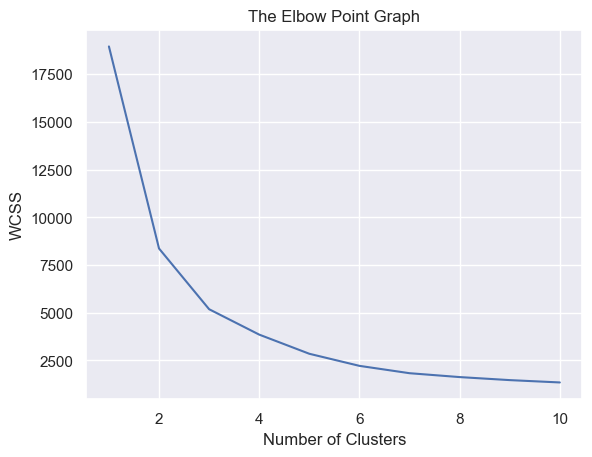

In [8]:
sns.set()

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

Y = kmeans.fit_predict(X)
print(Y)

[1 1 0 0 0 1 0 0 1 0 2 1 0 2 0 1 0 2 0 1 2 0 0 1 0 2 2 0 1 1 2 0 1 2 1 1 0
 2 2 1 1 1 1 0 0 2 2 1 1 1 1 2 1 1 1 1 2 0 0 2 1 0 0 1 1 2 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 2 2 1 2 1 0 0 2 1 1 0 1 0 2 0 1 2 1 1 0 1 0 0 0 1 0 2 1 1 0
 0 1 1 1 2 1 1 1 1 1 2 1 1 0 2 1 1 1 0 0 2 1 1 0 1 1 1 0 1 1 1 1 2 1 0 2 0
 0 0 2 0 1 2 0 1 1 0 0 1 1 0 1 1 1 0 2 0 2 0 1 1 1 0 0 1 2 1 1 0 1 2 1 0 1
 0 2 1 0 2 0 2 1 1 0 0 1 2 1]


Text(0, 0.5, 'Money On Book')

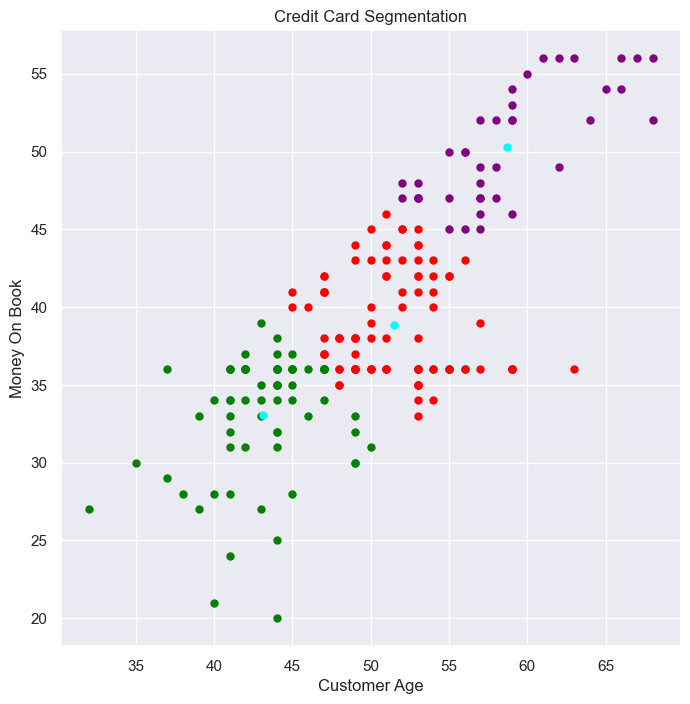

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=25,c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=25,c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=25,c='purple', label='Cluster 3')
#plt.scatter(X[Y==3,0], X[Y==3,1], s=25,c='blue', label='Cluster 4')
#plt.scatter(X[Y==4,0], X[Y==4,1], s=25,c='yellow', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=25,c='cyan', label="Centroids")

plt.title('Credit Card Segmentation')
plt.xlabel('Customer Age')
plt.ylabel('Money On Book')